## Password Data



In [1]:
import polars as pl
pl.enable_string_cache()

# df = pl.read_csv('../data/passwords.csv', infer_schema_length=10000)
df = pl.read_csv('../data/passwords.csv', dtypes=[pl.UInt64, pl.Utf8, pl.Categorical, pl.Float64, pl.Categorical, pl.Float64, pl.UInt64, pl.UInt64, pl.UInt64], null_values=['NA'])
df.head()


rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
u64,str,cat,f64,cat,f64,u64,u64,u64
1,"""password""","""password-relat…",6.91,"""years""",2.17,1,8,11
2,"""123456""","""simple-alphanu…",18.52,"""minutes""",0.000011,2,4,8
3,"""12345678""","""simple-alphanu…",1.29,"""days""",0.00111,3,4,8
4,"""1234""","""simple-alphanu…",11.11,"""seconds""",1.1100e-7,4,4,8
5,"""qwerty""","""simple-alphanu…",3.72,"""days""",0.00321,5,8,11


In [2]:
df.describe()

describe,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
str,f64,str,str,f64,str,f64,f64,f64,f64
"""count""",500.0,"""500""","""500""",500.0,"""500""",500.0,500.0,500.0,500.0
"""null_count""",0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0
"""mean""",250.5,null,null,5.60266,null,0.50001,251.224,7.432,10.298
"""std""",144.481833,null,null,8.436005,null,2.658132,145.052163,5.415536,3.651282
"""min""",1.0,"""1111""",null,1.29,null,1.1100e-7,1.0,0.0,0.0
"""25%""",126.0,null,null,3.43,null,0.00321,126.0,6.0,10.0
"""50%""",251.0,null,null,3.72,null,0.00321,252.0,7.0,11.0
"""75%""",376.0,null,null,3.72,null,0.0835,377.0,8.0,11.0
"""max""",500.0,"""zzzzzz""",null,92.27,null,29.27,502.0,48.0,28.0


In [3]:
from datetime import datetime, timedelta

time_mult = {
    'seconds': 1000,
    'minutes': 60*1000,
    'hours': 60*60*1000,
    'days': 24*60*60*1000,
    'weeks': 7*60*60*1000,
    'months': 30*24*60*60*1000,
    'years': 12*30*24*60*60*1000,
}

def time_convert(val: float, unit: str) -> int:
    return int(val * time_mult[unit])

df = df.with_columns(
    pl.struct(['value', 'time_unit'])
    .map_elements(lambda col: time_convert(col['value'], col['time_unit']))
    .alias('online_crack_sec')
    .cast(pl.Duration('ms'))
)

df.head()

rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,online_crack_sec
u64,str,cat,f64,cat,f64,u64,u64,u64,duration[ms]
1,"""password""","""password-relat…",6.91,"""years""",2.17,1,8,11,2487d 14h 24m
2,"""123456""","""simple-alphanu…",18.52,"""minutes""",0.000011,2,4,8,18m 31s 200ms
3,"""12345678""","""simple-alphanu…",1.29,"""days""",0.00111,3,4,8,1d 6h 57m 36s
4,"""1234""","""simple-alphanu…",11.11,"""seconds""",1.1100e-7,4,4,8,11s 110ms
5,"""qwerty""","""simple-alphanu…",3.72,"""days""",0.00321,5,8,11,3d 17h 16m 48s


In [4]:
categories = df.select(pl.col('category').value_counts(sort=True)).unnest('category')\
  .select((pl.col('category'), pl.col('counts'), (pl.col('counts')/pl.col('counts').sum()).round(4).alias('pct'))
)
print(categories)

shape: (10, 3)
┌─────────────────────┬────────┬───────┐
│ category            ┆ counts ┆ pct   │
│ ---                 ┆ ---    ┆ ---   │
│ cat                 ┆ u32    ┆ f64   │
╞═════════════════════╪════════╪═══════╡
│ name                ┆ 183    ┆ 0.366 │
│ cool-macho          ┆ 79     ┆ 0.158 │
│ simple-alphanumeric ┆ 61     ┆ 0.122 │
│ fluffy              ┆ 44     ┆ 0.088 │
│ …                   ┆ …      ┆ …     │
│ animal              ┆ 29     ┆ 0.058 │
│ password-related    ┆ 15     ┆ 0.03  │
│ food                ┆ 11     ┆ 0.022 │
│ rebellious-rude     ┆ 11     ┆ 0.022 │
└─────────────────────┴────────┴───────┘


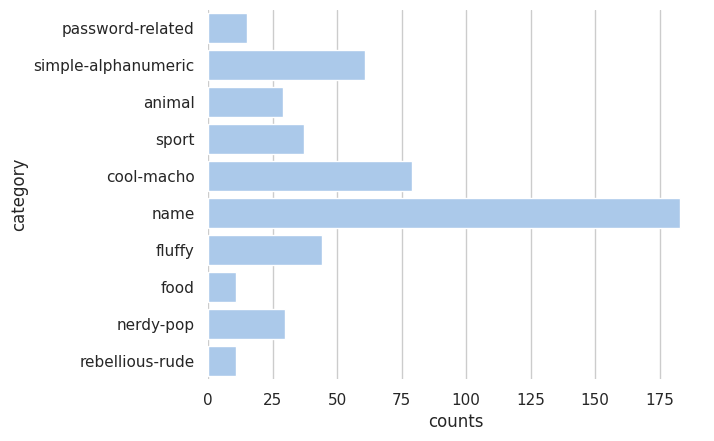

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(
    categories,
    x='counts',
    y='category',
    color='b',
)

# ax.legend(ncol=1, loc='lower right', frameon=True)
# ax.set(xlim=(0,185), ylabel='', xlabel='Passwords by Categories')
sns.despine(left=True, bottom=True)

In [7]:
import plotly.express as px

fig = px.bar(categories, x='counts', y='category', orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'}) 
fig.show()

In [12]:
fig = px.histogram(df, y='strength', barmode='group', orientation='h', title='Strengths Histogram')
fig.show()